<a href="https://colab.research.google.com/github/deepshah1300/ML/blob/master/exp13_J077.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import load_model
from keras.datasets import cifar10
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam

!pip install livelossplot
from livelossplot import PlotLossesKeras
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

170500096/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [2]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.
x_train_gray = x_train[:,:,:,0]
x_test_gray = x_test[:,:,:,0]

In [3]:
print('Training Shape:', x_train_gray.shape)
print('Number of train samples:', x_train_gray.shape[0])
print('Number of test samples:', x_test_gray.shape[0])
x_val = x_test_gray[:7000]
x_test = x_test_gray[7000:]
print("Validation Data Shape: {0} \nTest Data Shape: {1}".format(x_val.shape, x_test.shape))

Training Shape: (50000, 32, 32)
Number of train samples: 50000
Number of test samples: 10000
Validation Data Shape: (7000, 32, 32) 
Test Data Shape: (3000, 32, 32)


In [4]:
input_img = Input(shape=(32, 32))

#Encoding
x = Dense(64, activation = 'relu')(input_img)
x = Dense(32, activation = 'relu')(x)
x = Dense(16, activation = 'relu')(x)
encoded = Dense(8, activation = 'relu')(x)

# Decoding
x = Dense(8, activation = 'relu')(encoded)
x = Dense(16, activation = 'relu')(x)
x = Dense(32, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
decoded = Dense(32, activation = 'sigmoid')(x)

In [5]:
model = Model(input_img, decoded)
model.compile(optimizer='adam', loss='binary_crossentropy')

In [6]:
print('Training Shape:', x_train_gray.shape)
print("Validation Shape: ",(x_val.shape, x_test.shape))
print('Testing Shape:', x_test.shape)

Training Shape: (50000, 32, 32)
Validation Shape:  ((7000, 32, 32), (3000, 32, 32))
Testing Shape: (3000, 32, 32)


In [7]:
batch_size = 32
num_classes = 10
epochs = 10
chkpt = 'AutoEncoder_Cifar10_Deep_weights.hdf5'
mc = ModelCheckpoint(filepath = chkpt, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'auto')

history = model.fit(x_train_gray, x_train_gray, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (x_val, x_val), 
                    callbacks = [mc])

Epoch 1/10
1562/1563 [============================>.] - ETA: 0s - loss: 0.5910
Epoch 00001: val_loss improved from inf to 0.58108, saving model to AutoEncoder_Cifar10_Deep_weights.hdf5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5910 - val_loss: 0.5811
Epoch 2/10
1563/1563 [==============================] - ETA: 0s - loss: 0.5789
Epoch 00002: val_loss improved from 0.58108 to 0.57934, saving model to AutoEncoder_Cifar10_Deep_weights.hdf5
1563/1563 [==============================] - 9s 5ms/step - loss: 0.5789 - val_loss: 0.5793
Epoch 3/10
1563/1563 [==============================] - ETA: 0s - loss: 0.5754
Epoch 00003: val_loss improved from 0.57934 to 0.57377, saving model to AutoEncoder_Cifar10_Deep_weights.hdf5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5754 - val_loss: 0.5738
Epoch 4/10
1559/1563 [============================>.] - ETA: 0s - loss: 0.5728
Epoch 00004: val_loss improved from 0.57377 to 0.57335, saving model to AutoEncoder_C

In [8]:
score = model.evaluate(x_test, x_test, verbose=1)
print(score)

94/94 [==============================] - 0s 2ms/step - loss: 0.5693
0.5693048238754272


In [9]:
c10test = model.predict(x_test)
c10val = model.predict(x_val)
print("Validation Dataset Score: {0}\nTest Dataset Score: {1}".format(np.average(c10val), np.average(c10test)))

Validation Dataset Score: 0.49606284499168396
Test Dataset Score: 0.49103018641471863


In [10]:
def showImage(orig, dec, num=10):
  n = num 
  plt.figure(figsize=(20, 4))
  for i in range(n):
      # display original
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(orig[i].reshape(32,32))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # display reconstruction
      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(dec[i].reshape(32,32))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()

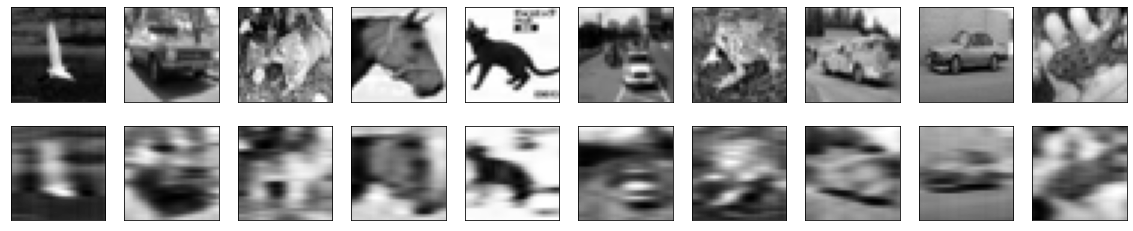

In [11]:
showImage(x_test, c10test)